In [120]:
#PREDECIR SI SE TIENE CANCER DE SENO REACUERDO A LOS ATRIBUTOS
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
from sklearn import datasets
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [121]:
#Importamos los datos de la misma librería de scikit-learn
dataset = datasets.load_breast_cancer()


In [122]:
#características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

In [123]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [124]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [125]:
#Seleccionamos todas las columnas
X = dataset.data

In [126]:
#Defino los datos correspondientes a las etiquetas
y = dataset.target

In [127]:

from sklearn.model_selection import train_test_split

In [128]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [129]:
#Entrena al modelo usando los conjuntos de entrenamiento
from sklearn.tree import DecisionTreeClassifier as DTC
clasificador = DTC(criterion='entropy', random_state = 0) #ayudar a decidir qué atributo debe ser el siguiente en seleccionarse
clasificador.fit (X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [130]:
#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clasificador.predict(X_test)

In [131]:
#Importe el módulo de métricas scikit-learn para calcular la precisión
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

# Precisión del modelo

print("Presicion:",metrics.precision_score(y_test, y_pred))


Presicion: 0.9178082191780822


In [132]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred, labels=[1,0])
print('Matriz de Confusión:')
print(matriz)


Matriz de Confusión:
[[67  1]
 [ 6 40]]


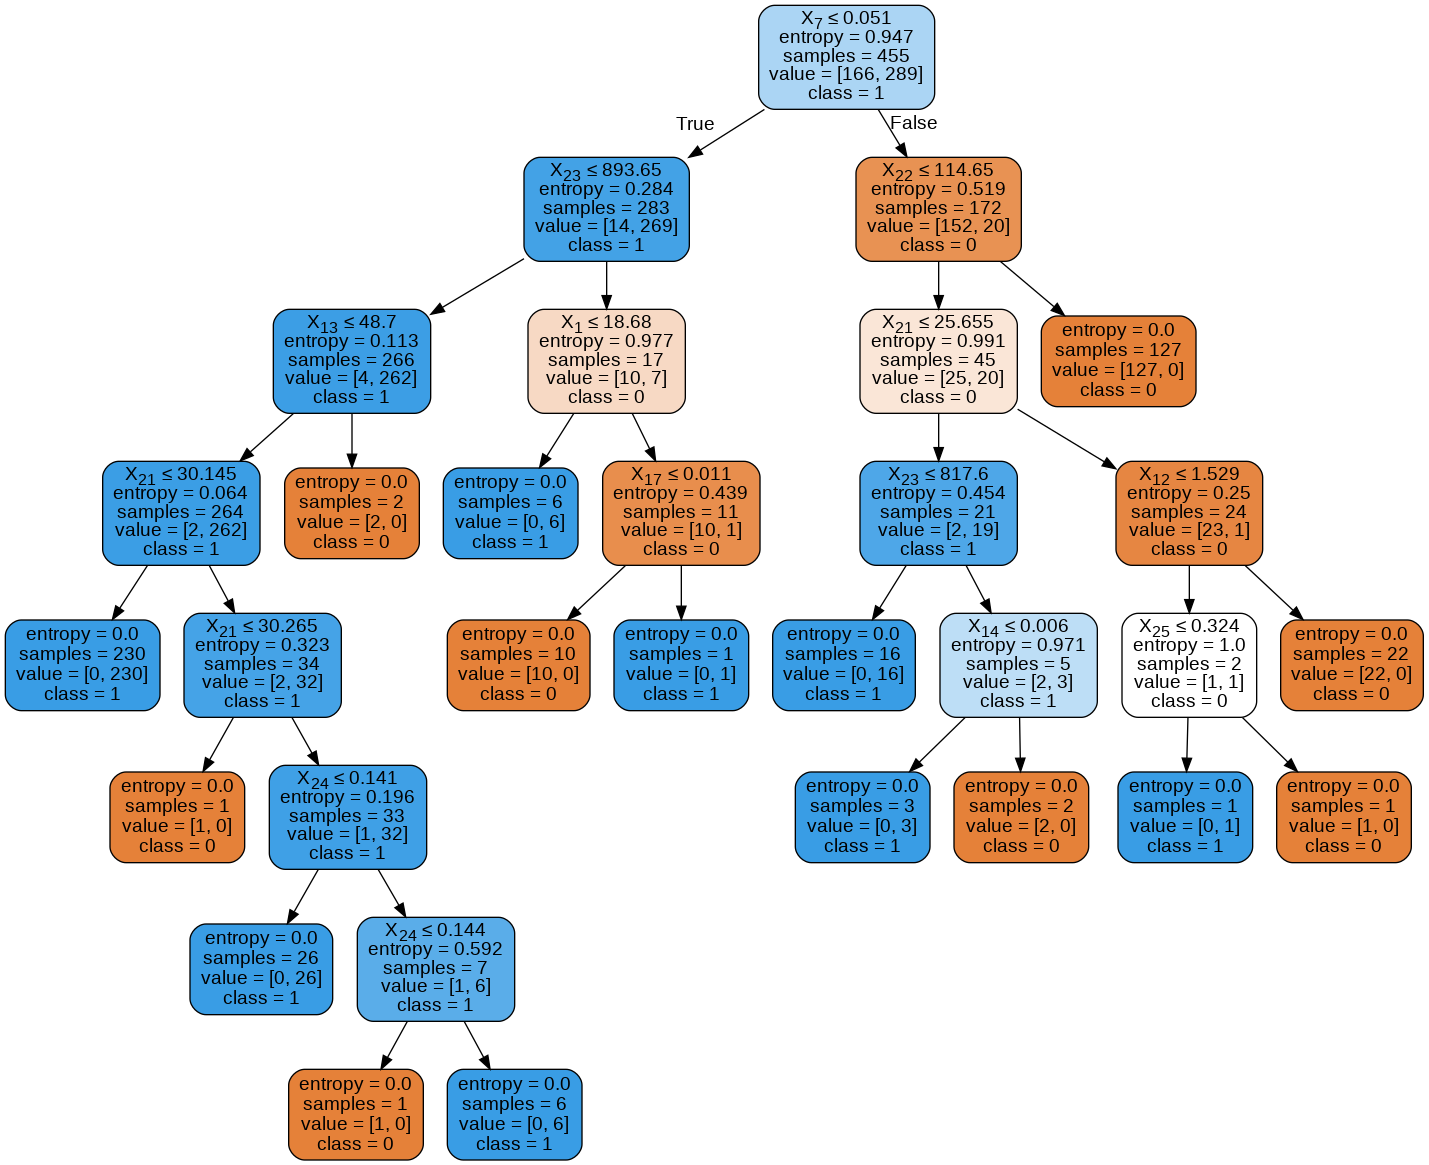

In [133]:
#Visualizar el árbol de desición: utilizando la funcion "export_graphviz" 
#que convierte el clasificador en un archivo de puntos y "pydotplus" genera el archivo en png.
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Graficando el clasificador:
dot_data = StringIO()
export_graphviz(clasificador, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CANCER.png')
Image(graph.create_png())